In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import datetime 
import copy
from time import strftime
import time
import plotly.graph_objs as go
%matplotlib inline 

In [2]:
data = pd.read_csv("//Users//maheshsai//Downloads//novel-corona-virus-2019-dataset//covid_19_data.csv")
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [26]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'], errors='coerce')
data['dateStr'] = data['ObservationDate'].dt.strftime('%d/%m/%Y')
#for i in data.index :
da=[]
da=data['dateStr'].unique()
#data[int(data['ObservationDate'][i][3:5])==1 for i in data.index]

In [33]:
da1=[]
da2=[]
da3=[]
for i in da:
    if(i[3:5]=='01'):
        da1.append(i)
    elif (i[3:5]=='02'):
        da2.append(i)
    else:
        da3.append(i)

In [34]:
data[data['dateStr'].isin(da2)]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,dateStr
493,494,2020-02-01,Hubei,Mainland China,2/1/2020 11:53,7153.0,249.0,168.0,01/02/2020
494,495,2020-02-01,Zhejiang,Mainland China,2/1/2020 10:53,599.0,0.0,21.0,01/02/2020
495,496,2020-02-01,Guangdong,Mainland China,2/1/2020 14:23,535.0,0.0,14.0,01/02/2020
496,497,2020-02-01,Henan,Mainland China,2/1/2020 1:52,422.0,2.0,3.0,01/02/2020
497,498,2020-02-01,Hunan,Mainland China,2/1/2020 11:03,389.0,0.0,8.0,01/02/2020
498,499,2020-02-01,Anhui,Mainland China,2/1/2020 13:33,297.0,0.0,5.0,01/02/2020
499,500,2020-02-01,Jiangxi,Mainland China,2/1/2020 1:52,286.0,0.0,9.0,01/02/2020
500,501,2020-02-01,Chongqing,Mainland China,2/1/2020 8:43,247.0,1.0,3.0,01/02/2020
501,502,2020-02-01,Sichuan,Mainland China,2/1/2020 1:52,207.0,1.0,3.0,01/02/2020
502,503,2020-02-01,Shandong,Mainland China,2/1/2020 7:51,206.0,0.0,3.0,01/02/2020


In [3]:
date_data = data[['ObservationDate',"Confirmed","Deaths","Recovered"]]

In [4]:
date_data = date_data.groupby(["ObservationDate"]).sum().reset_index()



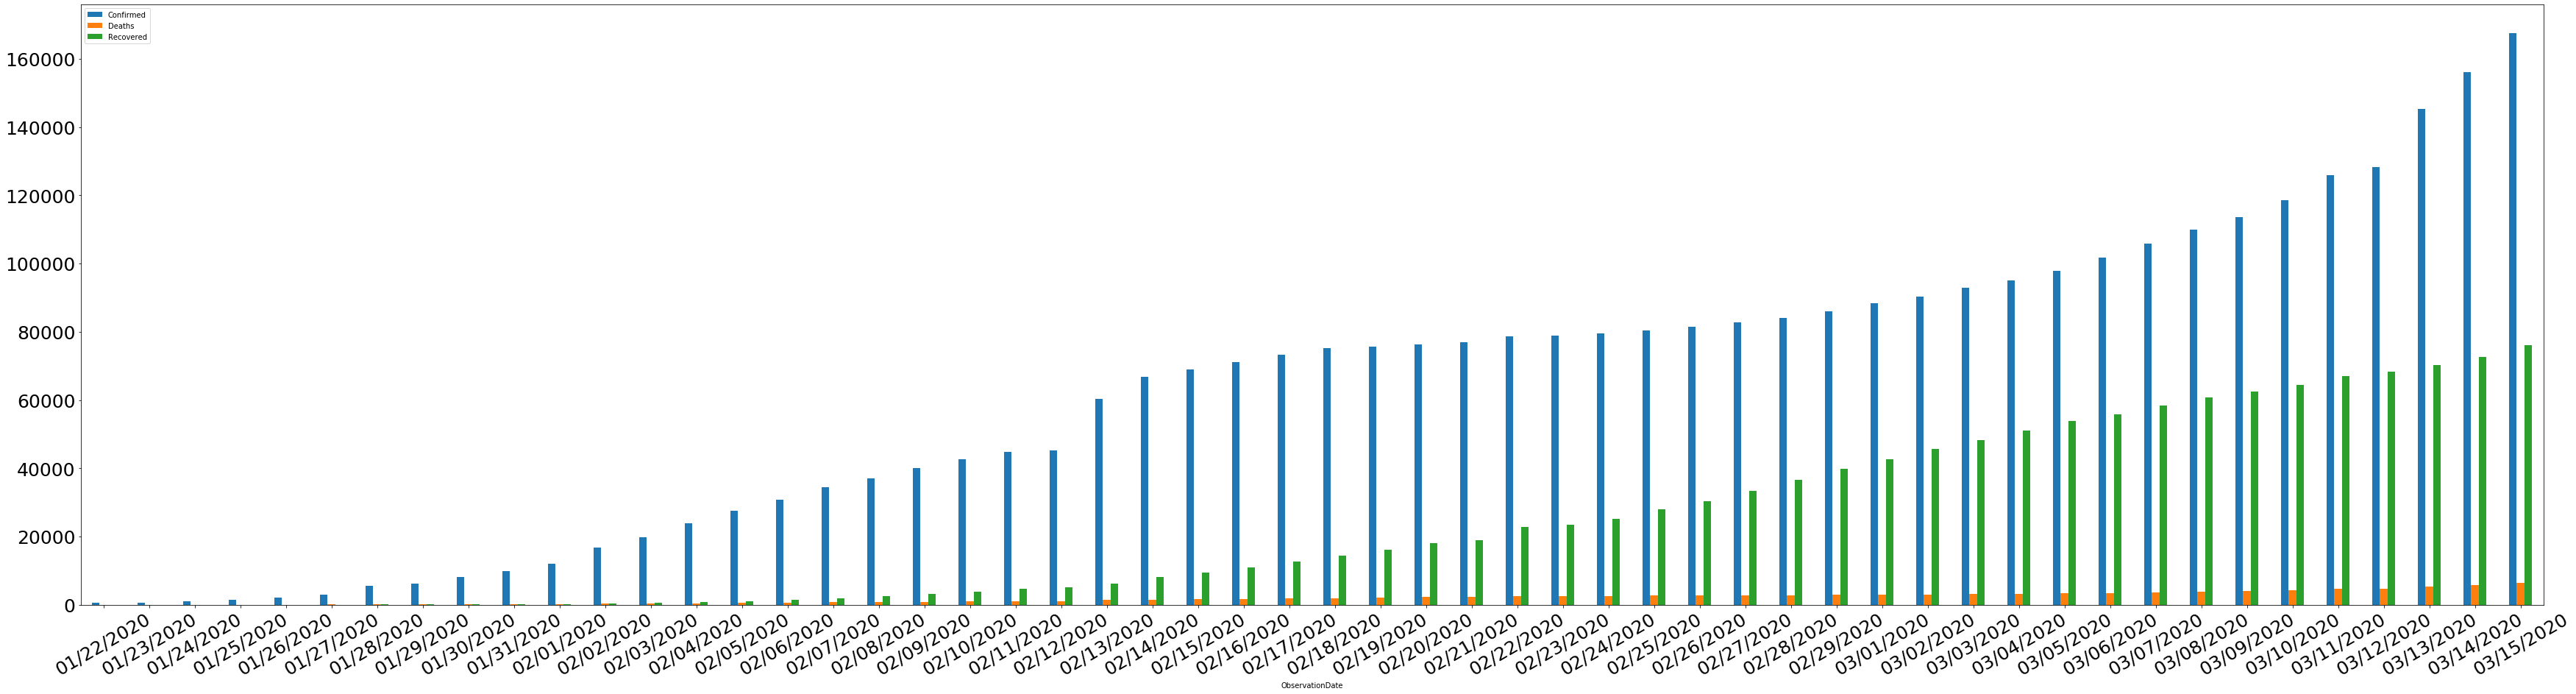

In [5]:
date_data.plot('ObservationDate',['Confirmed', 'Deaths', 'Recovered'],kind='bar',figsize=(60,15), fontsize=25, rot=30)

In [6]:
import plotly.express as px

In [203]:
fig = px.bar(date_data,x="ObservationDate",y='Confirmed',color='Confirmed')
fig.update_layout(
    title="Cases received over time",
    
)
fig.show()

In [8]:
fig = px.bar(date_data,x="ObservationDate",y='Deaths',color="Deaths")

fig.show()

In [9]:
fig = px.scatter(date_data, x="ObservationDate", y="Confirmed", color="Confirmed")
fig.show()

In [10]:
fig = px.scatter(date_data, x="ObservationDate", y="Deaths", color="Confirmed")
fig.show()

In [11]:
places_unique = data['Province/State'][data.Confirmed > 0].unique()

In [12]:
len(places_unique)

264

In [13]:
places_unique

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Henan', 'Hubei', 'Hunan', 'Jiangsu',
       'Jiangxi', 'Liaoning', 'Macau', 'Ningxia', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Taiwan', 'Tianjin', 'Washington', 'Yunnan',
       'Zhejiang', nan, 'Gansu', 'Heilongjiang', 'Hong Kong', 'Jilin',
       'Shaanxi', 'Xinjiang', 'Inner Mongolia', 'Chicago', 'Qinghai',
       'Illinois', 'California', 'Arizona', 'Ontario', 'New South Wales',
       'Victoria', 'British Columbia', 'Bavaria', 'Tibet', 'Queensland',
       'Chicago, IL', 'South Australia', 'Boston, MA', 'Los Angeles, CA',
       'Orange, CA', 'Santa Clara, CA', 'Seattle, WA', 'Tempe, AZ',
       'San Benito, CA', 'Toronto, ON', 'London, ON', 'Madison, WI',
       'Cruise Ship', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'San Antonio, TX', 'Ashland, NE',
       'Travis, CA', 'From Diamond Princess', 'Lackland, TX', 'None',
       'Humboldt

In [14]:
countries_unique = data['Country/Region'][data.Confirmed > 0].unique()

In [15]:
len(countries_unique)

161

In [16]:
countries_unique_data = []
#latest_date = filtered_dates[-1]
for i in countries_unique :   
    countries_unique_data.append(data[data['Country/Region']==i].Confirmed.sum()) 
    

In [19]:
places_unique_data = []
#latest_date = filtered_dates[-1]
for i in places_unique :   
    places_unique_data.append(data[data['Province/State']==i].Confirmed.sum()) 
    

In [20]:
for i in range(len(countries_unique)):
    print(f'{countries_unique[i]}: {countries_unique_data[i]} ')

Mainland China: 2877598.0 
Macau: 479.0 
Taiwan: 1363.0 
US: 15572.0 
Japan: 9992.0 
Thailand: 1895.0 
South Korea: 112920.0 
Hong Kong: 3352.0 
Singapore: 4121.0 
Vietnam: 854.0 
France: 24632.0 
Australia: 2130.0 
Nepal: 51.0 
Malaysia: 2443.0 
Canada: 1583.0 
Cambodia: 72.0 
Sri Lanka: 82.0 
Ivory Coast: 6.0 
Germany: 24990.0 
Finland: 938.0 
United Arab Emirates: 1070.0 
Philippines: 587.0 
India: 792.0 
Italy: 142850.0 
UK: 5922.0 
Russia: 360.0 
Sweden: 5197.0 
Spain: 29317.0 
Belgium: 3868.0 
Others: 20564.0 
Egypt: 646.0 
Iran: 102312.0 
Israel: 1107.0 
Lebanon: 631.0 
Oman: 255.0 
Afghanistan: 74.0 
Bahrain: 1857.0 
Iraq: 935.0 
Kuwait: 1206.0 
Austria: 3260.0 
Algeria: 286.0 
Croatia: 279.0 
Switzerland: 8051.0 
Pakistan: 224.0 
Brazil: 675.0 
Georgia: 207.0 
Greece: 1346.0 
North Macedonia: 84.0 
Norway: 5885.0 
Romania: 537.0 
Denmark: 4048.0 
Estonia: 461.0 
Netherlands: 5368.0 
San Marino: 618.0 
 Azerbaijan: 1.0 
Belarus: 152.0 
Iceland: 1001.0 
Lithuania: 44.0 
Mexico: 

In [22]:
di={'country':countries_unique,'cases':countries_unique_data}

In [23]:
do = { 'state':places_unique,'cases':places_unique_data}

In [24]:
ds=pd.DataFrame(di)

In [25]:
placesd=pd.DataFrame(do)

In [26]:
ds.head()

,country,cases
0,Mainland China,2877598.0
1,Macau,479.0
2,Taiwan,1363.0
3,US,15572.0
4,Japan,9992.0


In [27]:
placesd.head()

,state,cases
0,Anhui,39727.0
1,Beijing,17079.0
2,Chongqing,24049.0
3,Fujian,12510.0
4,Guangdong,55927.0


In [40]:
fig = px.bar(ds[(ds['country']!='Mainland China') & (ds['cases']>400)],x="cases",y='country',color='cases',orientation='h')
fig.update_layout(
    title="Cases in each country",
    
)

fig.show()

In [43]:
fig = px.bar(placesd[(placesd['state']!='Hubei') & (placesd['cases']>50)],x="cases",y='state',color='cases',orientation='h')
fig.update_layout(
    title="Cases in each state",
    
)
fig.show()

In [44]:
import pyowm

In [45]:
import pyowm.weatherapi25.historian

In [46]:
owm=pyowm.OWM('Your api key')

In [47]:
hf = pyowm.weatherapi25.historian.Historian('Andhra Pradesh')

In [48]:
k= hf.average_humidity()

AttributeError: 'str' object has no attribute 'get_measurements'

In [49]:
hf.average_temperature('celsius')

AttributeError: 'str' object has no attribute 'get_measurements'

In [50]:
observation=owm.weather_at_place('Andhra Pradesh')

In [51]:
weather = observation.get_weather()
print(weather.get_humidity())
print(weather.get_temperature('celsius')['temp_max'])

25
31.8


In [52]:
# KIng country -> 26.25
#wenchester->24.4

In [53]:
(placesd[placesd['cases']>0]['cases']).mean()

11206.117870722434

In [54]:
sq = placesd[placesd['cases']>200]

In [55]:
sq

,state,cases
0,Anhui,39727.0
1,Beijing,17079.0
2,Chongqing,24049.0
3,Fujian,12510.0
4,Guangdong,55927.0
5,Guangxi,10325.0
6,Guizhou,5676.0
7,Hainan,6900.0
8,Hebei,12227.0
9,Henan,51626.0


In [56]:
len(sq)

59

In [57]:
df=ds[ds['cases']>200]

In [58]:
df =df[df['country']!='Others']

In [59]:
country_unique=df['country']

In [60]:
place_unique = sq['state']

In [61]:
sq[sq['state']=='Liaoning']

,state,cases
14,Liaoning,5272.0


In [62]:
q=list(place_unique)

In [63]:
print(q)

['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Henan', 'Hubei', 'Hunan', 'Jiangsu', 'Jiangxi', 'Liaoning', 'Macau', 'Ningxia', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan', 'Tianjin', 'Washington', 'Yunnan', 'Zhejiang', 'Gansu', 'Heilongjiang', 'Hong Kong', 'Jilin', 'Shaanxi', 'Xinjiang', 'Inner Mongolia', 'Qinghai', 'Illinois', 'California', 'Ontario', 'New South Wales', 'Victoria', 'British Columbia', 'Queensland', 'Toronto, ON', 'Diamond Princess cruise ship', 'Unassigned Location (From Diamond Princess)', 'King County, WA', 'Westchester County, NY', 'New York', 'Massachusetts', 'Georgia', 'Colorado', 'Florida', 'New Jersey', 'Texas', 'Pennsylvania', 'Louisiana', 'France', 'UK', 'Denmark', 'United Kingdom']


In [64]:
q.remove('Liaoning')

In [65]:
q.remove('Ningxia')

In [66]:
q.remove('Yunnan')

In [67]:
q.remove('Inner Mongolia')

In [68]:
q.remove('New South Wales')

In [69]:
q.remove('Toronto, ON')

In [70]:
q.remove('Diamond Princess cruise ship')

In [71]:
q.remove('Unassigned Location (From Diamond Princess)')

In [72]:
q.remove('UK')
q.remove('United Kingdom')

In [73]:
q.remove('King County, WA')

In [74]:
q.remove('Westchester County, NY')

In [75]:
print(q)

['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Henan', 'Hubei', 'Hunan', 'Jiangsu', 'Jiangxi', 'Macau', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan', 'Tianjin', 'Washington', 'Zhejiang', 'Gansu', 'Heilongjiang', 'Hong Kong', 'Jilin', 'Shaanxi', 'Xinjiang', 'Qinghai', 'Illinois', 'California', 'Ontario', 'Victoria', 'British Columbia', 'Queensland', 'New York', 'Massachusetts', 'Georgia', 'Colorado', 'Florida', 'New Jersey', 'Texas', 'Pennsylvania', 'Louisiana', 'France', 'Denmark']


In [76]:
country_unique=np.where(country_unique=='Mainland China','China', country_unique)

In [77]:
country_unique=np.where(country_unique=='US','America', country_unique)

In [78]:
country_unique=np.where(country_unique=='UK','London', country_unique)

In [79]:
country_unique=np.where(country_unique=='South Korea','Korea', country_unique)

In [80]:
a1=[]
a2=[]
for i in country_unique:
    #if(i!= 'Mainland China')
    a1.append(i)
    observation=owm.weather_at_place(i)
    weather = observation.get_weather()
    a2.append(weather.get_temperature('celsius')['temp'])

In [81]:
b1=[]
b2=[]
b3=[]
b4=[]
for i in states:
    b1.append(i)
    observation=owm.weather_at_place(i)
    weather = observation.get_weather()
    b2.append(weather.get_temperature('celsius')['temp_max'])
    b3.append(weather.get_pressure()['press'])
    b4.append(weather.get_humidity())

In [70]:
b1

['Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Henan',
 'Hubei',
 'Hunan',
 'Jiangsu',
 'Jiangxi',
 'Macau',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Taiwan',
 'Tianjin',
 'Washington',
 'Zhejiang',
 'Gansu',
 'Heilongjiang',
 'Hong Kong',
 'Jilin',
 'Shaanxi',
 'Xinjiang',
 'Qinghai',
 'Illinois',
 'California',
 'Ontario',
 'Victoria',
 'British Columbia',
 'Queensland',
 'New York',
 'Massachusetts',
 'Georgia',
 'Colorado',
 'Florida',
 'New Jersey',
 'Texas',
 'Pennsylvania',
 'Louisiana',
 'France',
 'Denmark']

In [69]:
###### KIng country -> 26.25
#wenchester->24.4
b1.append('King County, WA')
b2.append(26.25)
b1.append('Westchester County, NY')
b2.append(24.4)
b1.append('United Kingdom')
b2.append(11.1)
b1.append('UK')
b2.append(11.1)
b1.append('Unassigned Location (From Diamond Princess)')
b2.append(19)
b1.append('Diamond Princess cruise ship')
b2.append(19)
b1.append('Toronto, ON')
b2.append(2.2)
b1.append('New South Wales')
b2.append(23)
b1.append('Inner Mongolia')
b2.append(3.05)
b1.append('Yunnan')
b2.append(22)
b1.append('Liaoning')
b2.append(20)

In [82]:
dre={'country':a1,'temp':a2}

In [83]:
dstate={'state':b1,'temp':b2,'press':b3,'humidity':b4}

In [84]:
saq=pd.DataFrame(dre)

In [85]:
sstate=pd.DataFrame(dstate)

In [86]:
newsc1 = pd.merge(df,saq,on='country')

In [87]:
newsc2 = pd.merge(sstate,sq,on="state")

In [89]:
newsc1.corr()

,cases,temp
cases,1.000000,0.027816
temp,0.027816,1.000000


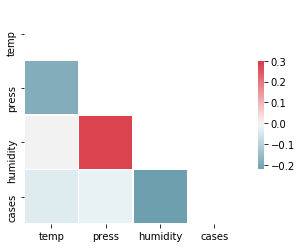

In [208]:
import seaborn as sns
import numpy as np
sns.heatmap(newsc2.corr(), mask=np.triu(np.ones_like(newsc2.corr(), dtype=np.bool)), cmap=sns.diverging_palette(220, 10, as_cmap=True), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [92]:
newsc2.sort_values(by='temp')

,state,temp,press,humidity,cases
18,Sichuan,-2.95,1011,34,21391.0
30,Illinois,-2.00,1031,79,280.0
37,Massachusetts,-1.67,1036,42,720.0
24,Heilongjiang,-0.82,1012,74,18126.0
29,Qinghai,-0.64,1010,17,803.0
34,British Columbia,-0.60,1018,72,601.0
43,Pennsylvania,0.00,1033,84,204.0
41,New Jersey,2.78,1031,70,263.0
36,New York,3.33,1033,37,2399.0
21,Washington,3.33,1018,67,2868.0


In [184]:
fig = px.scatter(newsc2[newsc2['state']!='Hubei'], x="temp", y="cases", color="cases",hover_data=["state"])
fig.update_layout(title="Effect of temperature on cases",
    xaxis_title="temp(celsius)",
    #yaxis_title="y Axis Title",
                 )
fig.show()

In [185]:
fig = px.scatter(newsc2[newsc2['state']!='Hubei'], x="press", y="cases", color="cases",hover_data=["state"])
fig.update_layout(title="Effect of pressure on cases",
    xaxis_title="preessure(atm)",
    #yaxis_title="y Axis Title",
                 )
fig.show()

In [186]:
fig = px.scatter(newsc2[newsc2['state']!='Hubei'], x="humidity", y="cases", color="cases",hover_data=["state"])
fig.update_layout(title="Effect of humiddity on cases",
    xaxis_title="humidity(units)",
    #yaxis_title="y Axis Title",
                 )
fig.show()

In [100]:
import plotly.graph_objects as go



fig = go.Figure()
fig.add_trace(go.Bar(
    x=newsc2[newsc2['state']!='Hubei']['cases'],
    y=newsc2['temp'],
    name='cases',
    marker_color='indianred'
))


# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [2]:
ind_df=pd.read_csv("//Users//maheshsai//Downloads//coronavirus-cases-in-india//Covid cases in India.csv")

In [3]:
ind_df.columns


Index(['S. No.', 'Name of State / UT',
       'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )',
       'Cured/Discharged/Migrated', 'Deaths'],
      dtype='object')

In [102]:
def color_max(s):
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

In [105]:
ind_df['Total cases'] = ind_df['Total Confirmed cases (Indian National)'] + ind_df['Total Confirmed cases ( Foreign National )'] 

In [107]:
ind_df['Active cases'] = ind_df['Total cases'] - (ind_df['Cured/Discharged/Migrated'] + ind_df['Deaths'])

In [114]:
#ind_df=ind_df.drop('S. No.',axis=1)
#ind_df.style.apply(color_max,subset=['Cured/Discharged/Migrated', 'Deaths','Total cases','Active cases'])
ind_df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Deaths,Total cases,Active cases
0,Andhra Pradesh,3,0,0,0,3,3
1,Chattisgarh,1,0,0,0,1,1
2,Delhi,25,1,5,1,26,20
3,Gujarat,7,0,0,0,7,7
4,Haryana,3,14,0,0,17,17
5,Himachal Pradesh,2,0,0,0,2,2
6,Karnataka,15,0,1,1,15,13
7,Kerala,33,7,3,0,40,37
8,Madhya Pradesh,4,0,0,0,4,4
9,Maharashtra,60,3,0,1,63,62


In [117]:
ind_df.columns

Index(['Name of State / UT', 'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )',
       'Cured/Discharged/Migrated', 'Deaths', 'Total cases', 'Active cases'],
      dtype='object')

In [125]:
ds=ind_df.sort_values('Active cases',ascending=True)
ds=ds[['Active cases','Name of State / UT']]

In [130]:
fig = px.bar(ds, 
             x="Active cases", y="Name of State / UT", 
             title='Total Active Cases', 
             text='Active cases', 
             orientation='h', 
             width=1000, height=700, range_x = [0, max(ind_df['Active cases'])])
fig.update_traces(marker_color='#f54266', opacity=0.8, textposition='inside')
fig.show()

In [131]:
df_India = pd.read_excel('//Users//maheshsai//Downloads//per_day_cases.xlsx',sheet_name='India')
df_Italy = pd.read_excel('//Users//maheshsai//Downloads//per_day_cases.xlsx',sheet_name="Italy")
df_Korea = pd.read_excel('//Users//maheshsai//Downloads//per_day_cases.xlsx',sheet_name="Korea")



In [137]:
sod = ind_df[['Active cases','Name of State / UT']]

In [138]:
states = sod['Name of State / UT']

In [153]:
states=np.where(states=='Telengana','Hyderabad', states)

In [157]:
states=np.where(states=='Jammu and Kashmir','Jammu', states)


In [163]:
states=np.where(states=='Ladakh','Kargil', states)




In [164]:
d1=[]
d2=[]
d3=[]
d4=[]
for i in states:
    
        d1.append(i)
        observation=owm.weather_at_place(i)
        weather = observation.get_weather()
        d2.append(weather.get_temperature('celsius')['temp_max'])
        d3.append(weather.get_pressure()['press'])
        d4.append(weather.get_humidity())

In [171]:
#a= [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1]
for n, i in enumerate(d1):
    if i == 'Hyderabad':
        d1[n] = 'Telengana'
    elif i == 'Jammu' :
        d1[n] = 'Jammu and Kashmir'
    elif i== 'Kargil' :
        d1[n] = 'Ladakh'


In [172]:
d1

['Andhra Pradesh',
 'Chattisgarh',
 'Delhi',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Odisha',
 'Pondicherry',
 'Punjab',
 'Rajasthan',
 'Tamil Nadu',
 'Telengana',
 'Chandigarh',
 'Jammu and Kashmir',
 'Ladakh',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [173]:
indstate={'Name of State / UT':d1,'temp':d2,'press':d3,'humidity':d4}

In [174]:
qw = pd.DataFrame(indstate)

In [175]:
newsc3 = pd.merge(sod,qw,on='Name of State / UT')

In [176]:
newsc3.style.background_gradient(cmap='Reds')

,Active cases,Name of State / UT,temp,press,humidity
0,3,Andhra Pradesh,31.8,1007,25
1,1,Chattisgarh,33.5,1009,20
2,20,Delhi,31,1012,29
3,7,Gujarat,36.88,1009,20
4,17,Haryana,31.97,1009,19
5,2,Himachal Pradesh,17.87,1015,27
6,13,Karnataka,35.26,1008,12
7,37,Kerala,33.73,1009,49
8,4,Madhya Pradesh,31.65,1009,17
9,62,Maharashtra,35.19,1008,12


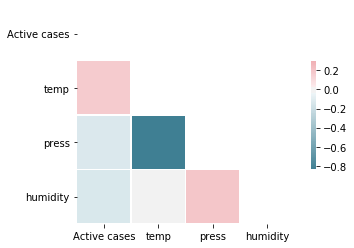

In [209]:
sns.heatmap(newsc3.corr(), mask=np.triu(np.ones_like(newsc3.corr(), dtype=np.bool)), cmap=sns.diverging_palette(220, 10, as_cmap=True), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [183]:
fig = px.scatter(newsc3, x="temp", y="Active cases",hover_data=['Name of State / UT'] ,color="Active cases")
fig.update_layout(title="Effect of temperature on cases",
    xaxis_title="temp(celsius)",
    #yaxis_title="y Axis Title",
                 )
fig.update_traces( textposition='middle right')
fig.show()

In [187]:
fig = px.scatter(newsc3, x="press", y="Active cases",hover_data=['Name of State / UT'] ,color="Active cases")
fig.update_layout(title="Effect of pressure on cases",
    xaxis_title="pressure(atm)",
    #yaxis_title="y Axis Title",
                 )
fig.update_traces( textposition='middle right')
fig.show()

In [188]:
fig = px.scatter(newsc3, x="humidity", y="Active cases",hover_data=['Name of State / UT'] ,color="Active cases")
fig.update_layout(title="Effect of humidity on cases",
    xaxis_title="humidity(units)",
    #yaxis_title="y Axis Title",
                 )
fig.update_traces( textposition='middle right')
fig.show()

In [136]:
import plotly.graph_objects as go
import numpy as np

title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(0,150,0)', 'rgb(255,0,0)', 'rgb(20,130,130)']

mode_size = [8, 8, 12]
line_size = [2, 2, 4]

fig = go.Figure()


fig.add_trace(go.Scatter(x=df_Korea['Days after surpassing 100 cases'], 
                 y=df_Korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True,
    ))
fig.add_trace(go.Scatter(x=df_Italy['Days after surpassing 100 cases'], 
                 y=df_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True,
    ))

fig.add_trace(go.Scatter(x=df_India['Days after surpassing 100 cases'], 
                 y=df_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True,
    ))
    
    
    


fig.update_layout(plot_bgcolor='white',title='Trend after surpassing 100 cases',xaxis_title='Days after 100 cases',yaxis_title='Cumulative cases')

fig.show()

In [189]:
import folium

In [190]:
India_coord = pd.read_csv('//Users//maheshsai//Downloads//coronavirus-cases-in-india//Indian Coordinates.csv')

In [194]:
df_full = pd.merge(India_coord,newsc3,on='Name of State / UT')


In [195]:
imap = folium.Map(location=[20, 100], zoom_start=3, tiles='cartodbpositron')

In [197]:
df_full.head()

,Name of State / UT,Latitude,Longitude,Unnamed: 3,Active cases,temp,press,humidity
0,Andhra Pradesh,14.750429,78.570026,NaN,3,31.80,1007,25
1,Chandigarh,30.719997,76.780006,NaN,1,28.26,1012,27
2,Delhi,28.669993,77.230004,NaN,20,31.00,1012,29
3,Haryana,28.450006,77.019991,NaN,17,31.97,1009,19
4,Jammu and Kashmir,33.450000,76.240000,NaN,4,26.68,1013,31


In [196]:
df_full.columns

Index(['Name of State / UT', 'Latitude', 'Longitude', 'Unnamed: 3',
       'Active cases', 'temp', 'press', 'humidity'],
      dtype='object')

In [198]:
for lat, long, cases, state,temp,press,humidity in zip(df_full['Latitude'],
                                                           df_full['Longitude'],
                                                           df_full['Active cases'],
                                                           df_full['Name of State / UT'],
                                                           df_full['temp'], 
                                                           df_full['press'],df_full['humidity']
                                                       
                                                      ):
    
    if (cases < 20):
        folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                                 '<strong>State:</strong> ' + str(state).capitalize() + '<br>'
                                 '<strong>Cases:</strong> ' + str(int(cases)) + '<br>'
                                 '<strong>Temperature:</strong> ' + str(int(temp)) + '<br>'
                                 '<strong>Pressure:</strong> ' + str(int(press)) + '<br>'+
                                 '<strong>Humidity:</strong> ' + str(int(humidity))+'<br>'
                              )
                    , icon=folium.Icon(color='darkblue',icon='info-sign'), color='rgb(55, 83, 109)'
                    , tooltip = str(state).capitalize(), fill_color='rgb(55, 83, 109)').add_to(imap)
    else:
        folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                                 '<strong>State:</strong> ' + str(state).capitalize() + '<br>'
                                 '<strong>Cases:</strong> ' + str(int(cases)) + '<br>'
                                 '<strong>Temperature:</strong> ' + str(int(temp)) + '<br>'
                                 '<strong>Pressure:</strong> ' + str(int(press)) + '<br>'+
                                 '<strong>Humidity:</strong> ' + str(int(humidity))+'<br>')
                    , icon=folium.Icon(color='red', icon='info-sign'), color='rgb(26, 118, 255)'
                    , tooltip = str(state).capitalize(), fill_color='rgb(26, 118, 255)').add_to(imap)

In [199]:
imap